<a href="https://colab.research.google.com/github/priya21rk/ICT_ML-AI/blob/main/ICT_CVD_(PROJECT_ML_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF CARDIOVASCULAR DISEASES USING MACHINE LEARNING**

To predict the presence / absence of cardiovascular disease in a person if the features
are given

# **LOADING THE DATA**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/cardio_train.csv')

# **EXPLORATORY DATA ANALYSIS**

In [6]:
#first few rows of the dataset
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,normal,normal,no,no,active,0
1,1,20228,female,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,18857,female,165,64.0,130,70,well above normal,normal,no,no,not active,1
3,3,17623,male,169,82.0,150,100,normal,normal,no,no,active,1
4,4,17474,female,156,56.0,100,60,normal,normal,no,no,not active,0


In [7]:
#information regarding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 6.9+ MB


In [8]:
#Check for missing values in each column
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
#dimension of the data
data.shape

(70000, 13)

In [10]:
#data types of each column
data.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [11]:
#count the number of unique values in each column
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [12]:
#summary statistics for numerical columns
data.describe()

,id,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414,0.499700
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530,0.500003
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


# **ENCODING**

# **LABEL ENCODING**

converting categorical variables into numerical values



In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
data['gender'] = label_encoder.fit_transform(data['gender'])

In [16]:
data['active'] = label_encoder.fit_transform(data['active'])

In [17]:
data['active'] = label_encoder.fit_transform(data['active'])

In [18]:
data['cholesterol'] = label_encoder.fit_transform(data['cholesterol'])

In [19]:
data['gluc'] = label_encoder.fit_transform(data['gluc'])

In [20]:
data['active'] = label_encoder.fit_transform(data['active'])

In [21]:
data['alco'] = label_encoder.fit_transform(data['alco'])

In [22]:
data['smoke'] = label_encoder.fit_transform(data['smoke'])

Converting age in days to age in years.

In [23]:
data.age = (data.age / 365.25)

In [24]:
data.age = data.age.astype(int)

In [25]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,0,0
1,1,55,0,156,85.0,140,90,2,1,0,0,0,1
2,2,51,0,165,64.0,130,70,2,1,0,0,1,1
3,3,48,1,169,82.0,150,100,1,1,0,0,0,1
4,4,47,0,156,56.0,100,60,1,1,0,0,1,0


In [26]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,52,1,168,76.0,120,80,1,1,1,0,0,0
69996,99995,61,0,158,126.0,140,90,0,0,0,0,0,1
69997,99996,52,1,183,105.0,180,90,2,1,0,1,1,1
69998,99998,61,0,163,72.0,135,80,1,0,0,0,1,1
69999,99999,56,0,170,72.0,120,80,0,1,0,0,0,0


# **PATIENTS WITH AND WITHOUT CVD**

In [27]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

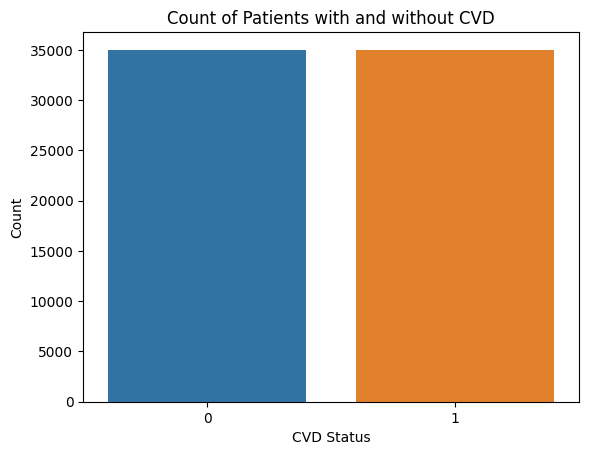

In [28]:
sns.countplot(x='cardio', data=data)
plt.xlabel('CVD Status')
plt.ylabel('Count')
plt.title('Count of Patients with and without CVD')
plt.show()

# **HISTOGRAM BASED ON FEATURES GIVEN**

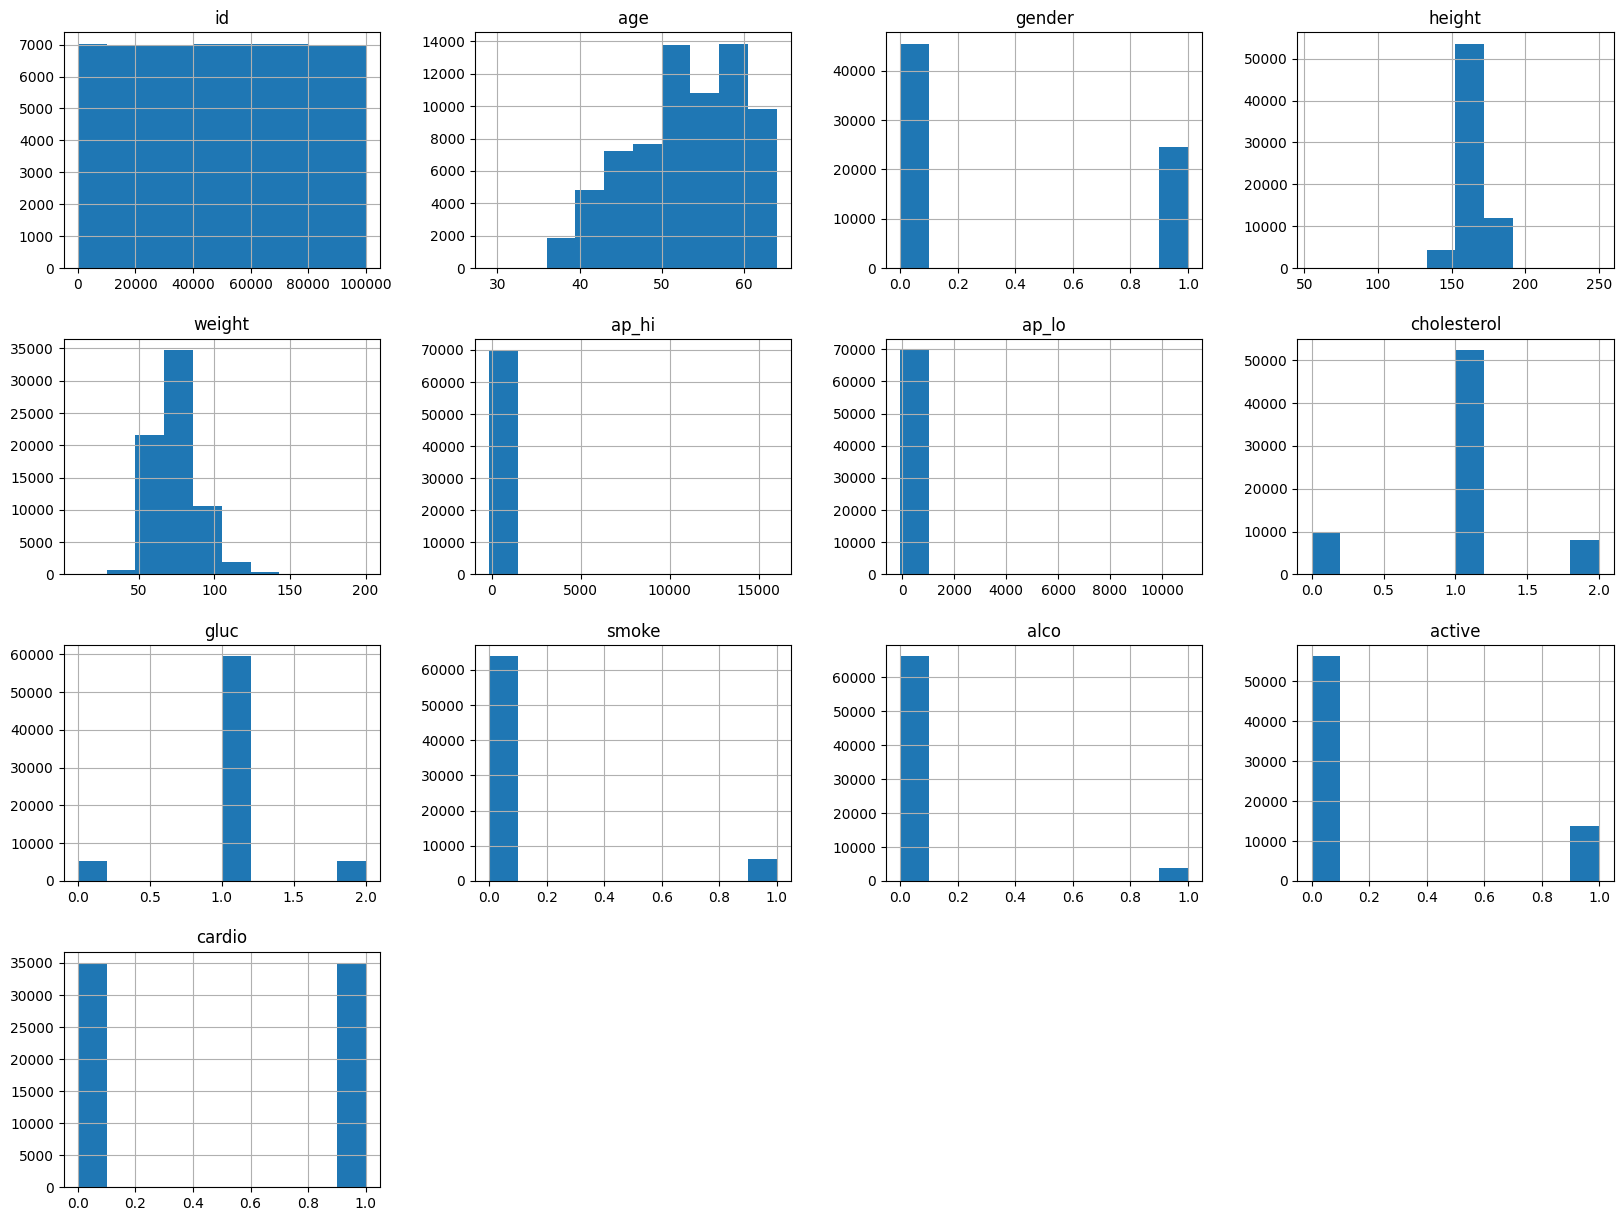

In [29]:
freqgraph = data.select_dtypes(include=['float', 'int'])
freqgraph.hist(figsize=(20,15))
plt.show()

# **CVD FREQUENCY BASED ON GENDER**

male - 1


female - 0




In [30]:
data.gender.value_counts()

0    45530
1    24470
Name: gender, dtype: int64

In [31]:
pd.crosstab(data.cardio, data.gender)

gender,0,1
cardio,,
0,22914,12107
1,22616,12363


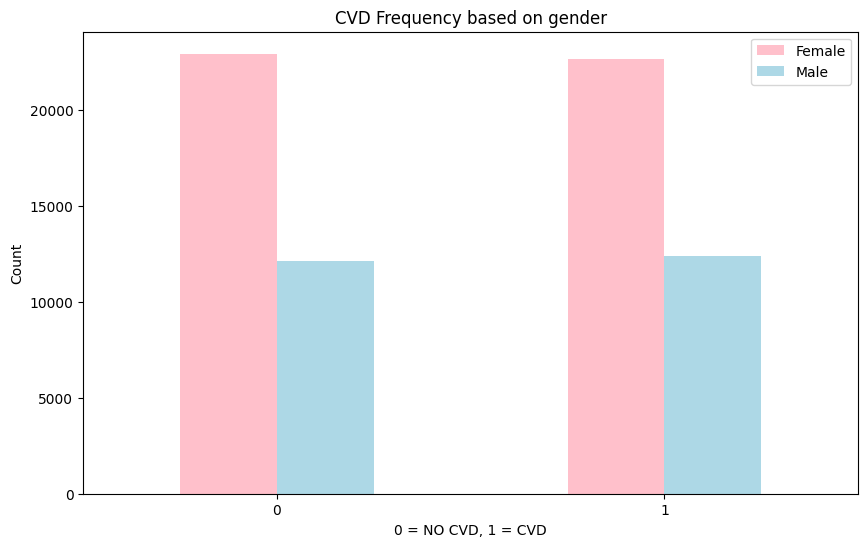

In [32]:
pd.crosstab(data.cardio, data.gender).plot(kind="bar", figsize=(10,6), color=["pink", "lightblue"]);
plt.title("CVD Frequency based on gender")
plt.xlabel("0 = NO CVD, 1 = CVD")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# **CVD FREQUENCY BASED ON CHOLESTEROL LEVEL**

normal - 0


above normal - 1


well above normal - 2

In [33]:
pd.crosstab(data.cholesterol, data.cardio)

cardio,0,1
cholesterol,,
0,3799,5750
1,29330,23055
2,1892,6174


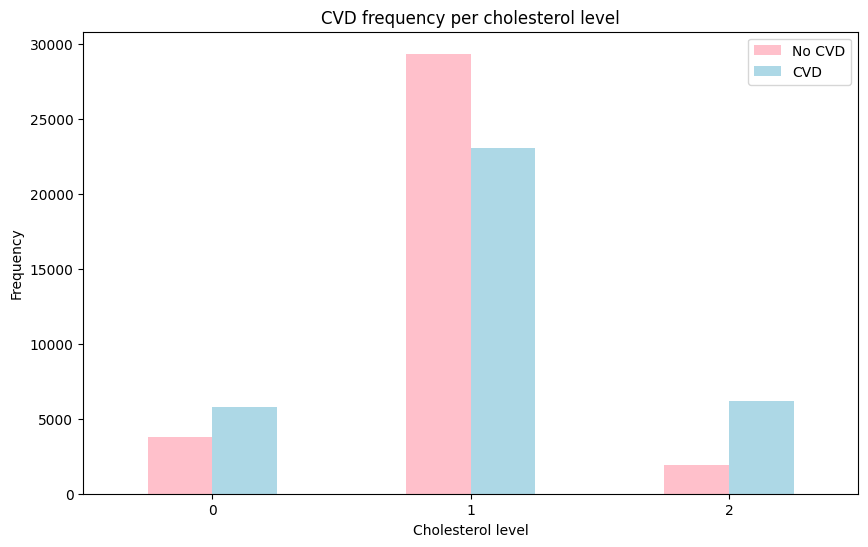

In [34]:
pd.crosstab(data.cholesterol, data.cardio).plot(kind="bar", figsize=(10,6), color=["pink", "lightblue"])
plt.title("CVD frequency per cholesterol level")
plt.xlabel("Cholesterol level")
plt.ylabel("Frequency")
plt.legend(["No CVD", "CVD"])
plt.xticks(rotation = 0);

# **AGE AND SYSTOLIC BLOOD PRESSURE FOR CVD**

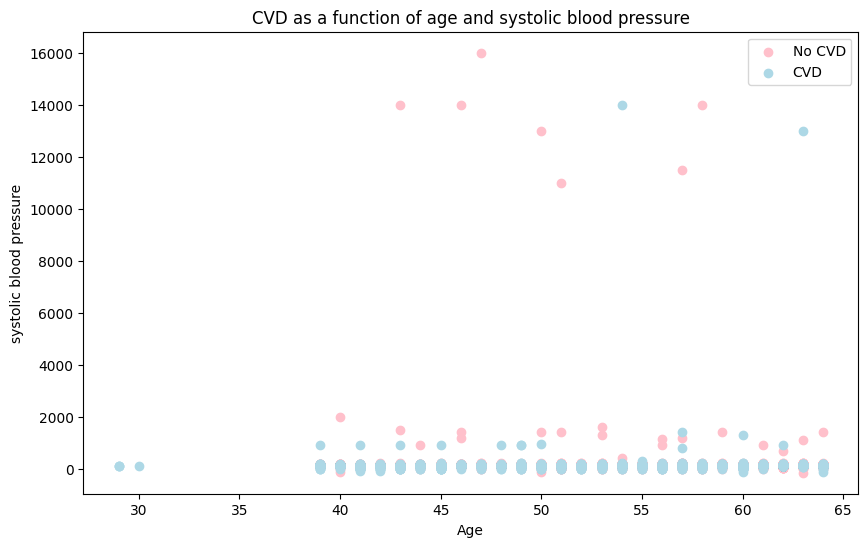

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.cardio==1], data.ap_hi[data.cardio==1], c="pink") 
plt.scatter(data.age[data.cardio==0], data.ap_hi[data.cardio==0], c="lightblue") 
plt.title("CVD as a function of age and systolic blood pressure")
plt.xlabel("Age")
plt.legend(["No CVD", "CVD"])
plt.ylabel("systolic blood pressure");

# **CORRELATION MATRIX**

In [36]:
data = pd.DataFrame(data)
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003836,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.002834,-0.000582,-0.003699,0.001210,-0.003755,0.003799
age,0.003836,1.000000,-0.022762,-0.081373,0.053567,0.020932,0.017553,0.081995,0.047455,-0.047479,-0.029674,0.009803,0.237949
gender,0.003502,-0.022762,1.000000,0.499033,0.155406,0.006005,0.015254,-0.007089,-0.010455,0.338135,0.170966,-0.005866,0.008109
height,-0.003038,-0.081373,0.499033,1.000000,0.290968,0.005488,0.006150,-0.010274,-0.001246,0.187989,0.094419,0.006570,-0.010821
weight,-0.001830,0.053567,0.155406,0.290968,1.000000,0.030702,0.043710,0.026419,-0.017506,0.067780,0.067113,0.016867,0.181660
ap_hi,0.003356,0.020932,0.006005,0.005488,0.030702,1.000000,0.016086,0.000308,-0.000678,-0.000922,0.001408,0.000033,0.054475
ap_lo,-0.002529,0.017553,0.015254,0.006150,0.043710,0.016086,1.000000,-0.003646,-0.006115,0.005186,0.010601,-0.004780,0.065719
cholesterol,0.002834,0.081995,-0.007089,-0.010274,0.026419,0.000308,-0.003646,1.000000,0.368864,-0.018230,-0.016207,-0.011549,0.066416
gluc,-0.000582,0.047455,-0.010455,-0.001246,-0.017506,-0.000678,-0.006115,0.368864,1.000000,-0.019814,-0.023783,-0.005073,0.012348
smoke,-0.003699,-0.047479,0.338135,0.187989,0.067780,-0.000922,0.005186,-0.018230,-0.019814,1.000000,0.340094,-0.025858,-0.015486


# **HEATMAP**

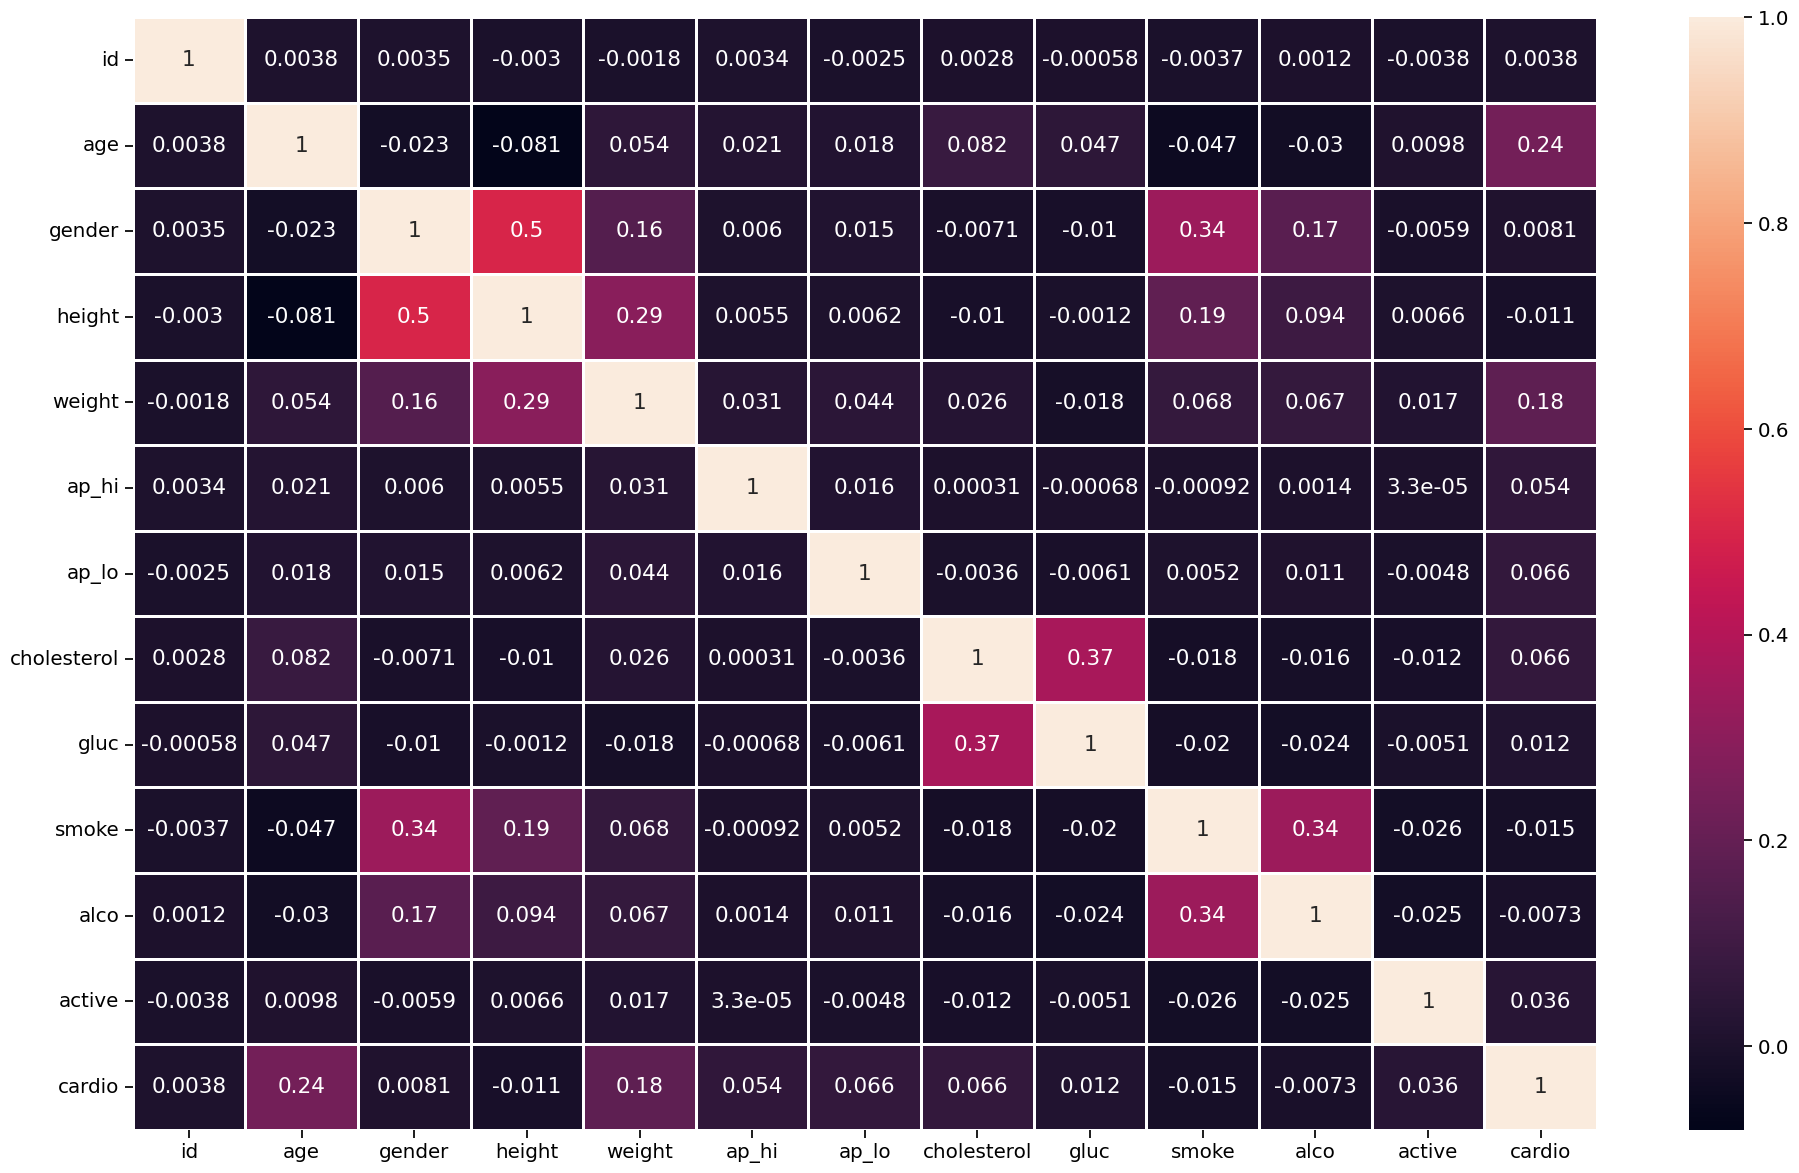

In [37]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

# **MISSING VALUES HANDLING**

In [38]:
data.isna().sum()
#no missing values found

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# **OUTLIERS DETECTION**

Outliers are data points that deviate significantly from the majority of the data.

Outliers can occur due to various reasons such as measurement errors, data entry errors, or genuine extreme values.

In [39]:
#displays the columns of the dataset
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# **BOXPLOT**

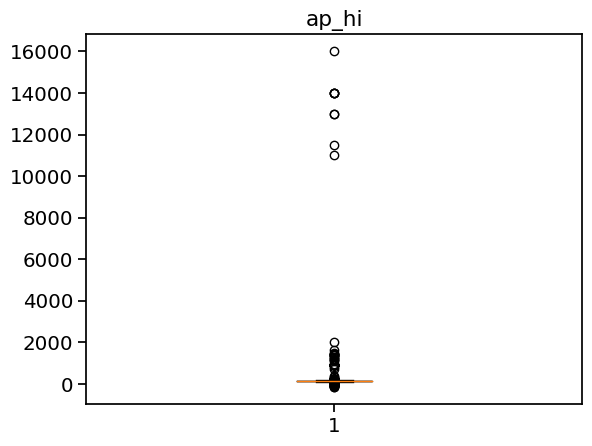

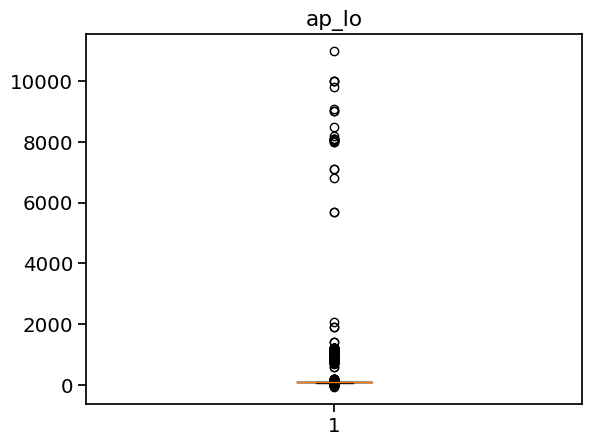

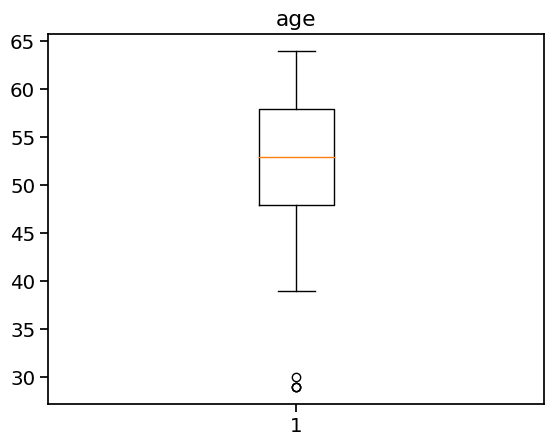

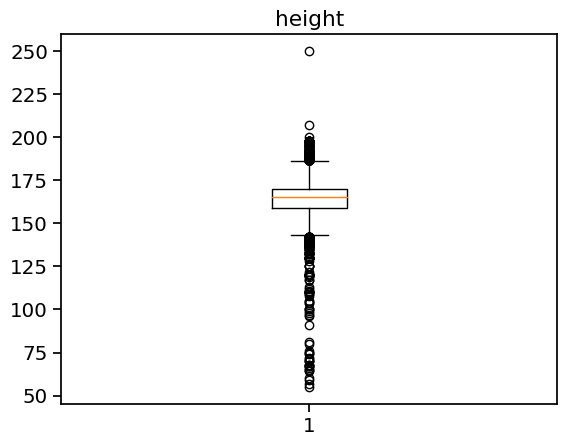

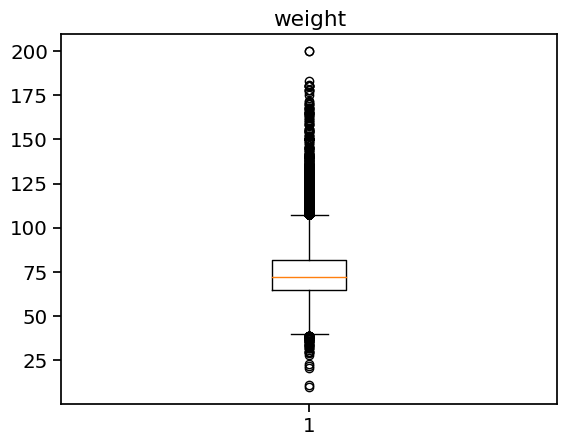

In [40]:
for i in ['ap_hi', 'ap_lo', 'age', 'height', 'weight']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# AP_HI(SYSTOLIC BLOOD PRESSURE)

In [41]:
Q1 = np.percentile(data['ap_hi'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['ap_hi'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['ap_hi'], 75, interpolation = 'midpoint')

<ipython-input-41-055196e2849e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_hi'], 25, interpolation = 'midpoint')
<ipython-input-41-055196e2849e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_hi'], 50, interpolation = 'midpoint')
<ipython-input-41-055196e2849e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.2

In [42]:
print(Q1)
print(Q2)
print(Q3)

120.0
120.0
140.0


In [43]:
data['ap_hi'].median()

120.0

In [44]:
IQR=Q3-Q1

In [45]:
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [46]:
low_lim

90.0

In [47]:
up_lim

170.0

In [48]:
outlier =[]
for x in data['ap_hi']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [49]:
outlier

[180,
 180,
 190,
 80,
 180,
 180,
 80,
 180,
 180,
 180,
 180,
 200,
 14,
 70,
 190,
 180,
 180,
 14,
 190,
 11,
 180,
 180,
 220,
 180,
 180,
 180,
 12,
 14,
 180,
 180,
 180,
 11,
 180,
 172,
 902,
 180,
 180,
 180,
 906,
 210,
 14,
 180,
 12,
 180,
 220,
 180,
 176,
 14,
 12,
 180,
 180,
 10,
 190,
 180,
 180,
 180,
 190,
 16,
 180,
 190,
 180,
 180,
 80,
 180,
 180,
 80,
 12,
 180,
 80,
 14,
 180,
 180,
 200,
 200,
 190,
 80,
 12,
 80,
 172,
 12,
 12,
 180,
 200,
 180,
 180,
 190,
 11,
 180,
 80,
 12,
 180,
 12,
 180,
 180,
 12,
 12,
 -100,
 80,
 180,
 12,
 180,
 200,
 200,
 180,
 909,
 70,
 80,
 180,
 190,
 220,
 85,
 180,
 180,
 180,
 11,
 180,
 172,
 7,
 190,
 179,
 180,
 180,
 85,
 80,
 180,
 180,
 180,
 180,
 180,
 180,
 200,
 200,
 180,
 180,
 180,
 180,
 180,
 180,
 200,
 11,
 190,
 180,
 178,
 180,
 180,
 190,
 180,
 175,
 180,
 70,
 180,
 180,
 180,
 180,
 180,
 190,
 80,
 200,
 15,
 180,
 180,
 180,
 200,
 80,
 180,
 11500,
 180,
 190,
 12,
 190,
 180,
 80,
 180,
 17,
 1

In [50]:
ind1 = data['ap_hi']<low_lim
data.loc[ind1].index

Int64Index([  209,   383,   567,   636,   927,   979,  1600,  1627,  1772,
             2167,
            ...
            68021, 68067, 68455, 68630, 68665, 68742, 68998, 69137, 69265,
            69549],
           dtype='int64', length=321)

In [51]:
ind1 = data['ap_hi'] < low_lim
values = data.loc[ind1].index.tolist()
values

[209,
 383,
 567,
 636,
 927,
 979,
 1600,
 1627,
 1772,
 2167,
 2203,
 2431,
 2528,
 2612,
 2853,
 2990,
 3447,
 3449,
 3623,
 3683,
 3834,
 3846,
 3858,
 3905,
 3949,
 4280,
 4347,
 4382,
 4465,
 4582,
 4595,
 4607,
 4616,
 4685,
 4830,
 4941,
 4983,
 5225,
 5382,
 5712,
 5760,
 6569,
 7076,
 7374,
 7506,
 7710,
 7949,
 8141,
 8280,
 8349,
 8422,
 8757,
 8947,
 9285,
 9298,
 9452,
 9735,
 9897,
 10232,
 10723,
 11050,
 11060,
 11102,
 11146,
 11454,
 11577,
 11793,
 11951,
 13172,
 13675,
 13709,
 13755,
 13883,
 14127,
 14269,
 14453,
 14500,
 14755,
 15704,
 16021,
 16340,
 16479,
 16629,
 17248,
 17277,
 17328,
 17529,
 17872,
 17929,
 17939,
 18096,
 18514,
 18877,
 19044,
 19363,
 19457,
 20192,
 20536,
 20694,
 20697,
 20777,
 20886,
 20917,
 20954,
 21425,
 22075,
 22510,
 22670,
 22772,
 22826,
 23703,
 23988,
 24431,
 24537,
 24548,
 24557,
 24672,
 24707,
 24825,
 24850,
 25117,
 25240,
 25454,
 25785,
 25812,
 26491,
 26513,
 26630,
 26991,
 27378,
 27502,
 28024,
 28026,


In [52]:
data.drop([209,
 383,
 567,
 636,
 927,
 979,
 1600,
 1627,
 1772,
 2167,
 2203,
 2431,
 2528,
 2612,
 2853,
 2990,
 3447,
 3449,
 3623,
 3683,
 3834,
 3846,
 3858,
 3905,
 3949,
 4280,
 4347,
 4382,
 4465,
 4582,
 4595,
 4607,
 4616,
 4685,
 4830,
 4941,
 4983,
 5225,
 5382,
 5712,
 5760,
 6569,
 7076,
 7374,
 7506,
 7710,
 7949,
 8141,
 8280,
 8349,
 8422,
 8757,
 8947,
 9285,
 9298,
 9452,
 9735,
 9897,
 10232,
 10723,
 11050,
 11060,
 11102,
 11146,
 11454,
 11577,
 11793,
 11951,
 13172,
 13675,
 13709,
 13755,
 13883,
 14127,
 14269,
 14453,
 14500,
 14755,
 15704,
 16021,
 16340,
 16479,
 16629,
 17248,
 17277,
 17328,
 17529,
 17872,
 17929,
 17939,
 18096,
 18514,
 18877,
 19044,
 19363,
 19457,
 20192,
 20536,
 20694,
 20697,
 20777,
 20886,
 20917,
 20954,
 21425,
 22075,
 22510,
 22670,
 22772,
 22826,
 23703,
 23988,
 24431,
 24537,
 24548,
 24557,
 24672,
 24707,
 24825,
 24850,
 25117,
 25240,
 25454,
 25785,
 25812,
 26491,
 26513,
 26630,
 26991,
 27378,
 27502,
 28024,
 28026,
 28089,
 28113,
 28184,
 28392,
 28466,
 28629,
 29170,
 29444,
 29510,
 29985,
 30260,
 30382,
 30766,
 30795,
 30930,
 31212,
 31315,
 32733,
 32797,
 33103,
 33493,
 33749,
 33915,
 34395,
 34427,
 34516,
 34528,
 34655,
 34743,
 35040,
 35308,
 35410,
 35566,
 36015,
 36305,
 36687,
 37329,
 37392,
 37455,
 37564,
 38250,
 38271,
 38627,
 38730,
 39240,
 39355,
 39409,
 39730,
 40454,
 40525,
 40634,
 40899,
 41503,
 41727,
 41933,
 42009,
 42138,
 42274,
 42334,
 42461,
 42656,
 42991,
 43128,
 43233,
 43484,
 43697,
 44051,
 44502,
 44844,
 44870,
 45019,
 45232,
 45446,
 45551,
 45951,
 46031,
 46155,
 46160,
 46608,
 46627,
 46685,
 46820,
 47166,
 47308,
 47407,
 47485,
 47696,
 47769,
 48290,
 48385,
 48839,
 48851,
 48881,
 49201,
 49736,
 49753,
 49886,
 50037,
 50888,
 51073,
 51650,
 52067,
 52580,
 52690,
 52851,
 53597,
 54045,
 54223,
 54447,
 54470,
 54517,
 54945,
 54957,
 55007,
 55043,
 55047,
 55126,
 55255,
 55256,
 55393,
 55412,
 55911,
 56108,
 56437,
 56635,
 56777,
 56825,
 56927,
 57236,
 57331,
 57364,
 57482,
 57786,
 57909,
 57926,
 57935,
 58013,
 58188,
 59044,
 59283,
 59958,
 59973,
 60106,
 60275,
 60578,
 60727,
 60922,
 61380,
 62176,
 62188,
 62261,
 62458,
 62719,
 62817,
 63077,
 63268,
 63698,
 63715,
 63913,
 64352,
 64409,
 64444,
 64454,
 64556,
 64626,
 65344,
 65685,
 65758,
 66123,
 66315,
 66657,
 66740,
 67137,
 67368,
 67421,
 67470,
 67658,
 67947,
 68021,
 68067,
 68455,
 68630,
 68665,
 68742,
 68998,
 69137,
 69265,
 69549],inplace=True)

In [53]:
outliers = data[(data['ap_hi'] < low_lim) | (data['ap_hi'] > up_lim)]

In [54]:
data = data[(data['ap_hi'] >= low_lim) & (data['ap_hi'] <= up_lim)]

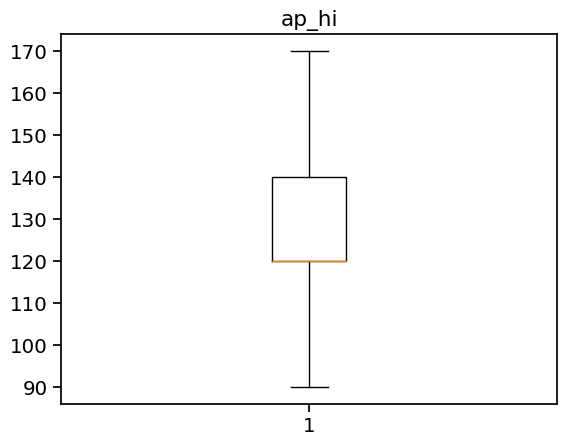

In [55]:
for i in [ 'ap_hi']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

# AP_LO(DISTOLIC BLOOD PRESSURE)

In [56]:
Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
Q3 = np.percentile(data['ap_lo'],75,interpolation ='midpoint')

<ipython-input-56-c0bca3bc1119>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
<ipython-input-56-c0bca3bc1119>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
<ipython-input-56-c0bca3bc1119>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q

In [57]:
print(Q1)
print(Q2)
print(Q3)

80.0
80.0
90.0


In [58]:
IQR = Q3-Q1

In [59]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [60]:
low_lim

65.0

In [61]:
up_lim

105.0

In [62]:
outlier=[]
for x in data['ap_lo']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)

In [63]:
outlier

[60,
 60,
 60,
 60,
 60,
 60,
 60,
 110,
 110,
 60,
 63,
 60,
 1100,
 1000,
 800,
 60,
 60,
 110,
 1000,
 1000,
 60,
 120,
 60,
 60,
 60,
 30,
 109,
 60,
 1033,
 150,
 60,
 50,
 60,
 40,
 110,
 60,
 1000,
 60,
 110,
 60,
 110,
 60,
 1000,
 60,
 60,
 110,
 110,
 60,
 1100,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 1000,
 60,
 60,
 1001,
 60,
 60,
 1000,
 1000,
 60,
 60,
 60,
 110,
 60,
 60,
 60,
 1000,
 60,
 110,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 1000,
 60,
 1000,
 1200,
 1100,
 1100,
 60,
 60,
 60,
 60,
 1000,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 1000,
 60,
 60,
 60,
 60,
 50,
 60,
 60,
 60,
 60,
 60,
 1100,
 60,
 120,
 120,
 50,
 60,
 60,
 60,
 60,
 60,
 1100,
 1000,
 60,
 60,
 1000,
 60,
 10000,
 150,
 60,
 60,
 1000,
 60,
 1001,
 60,
 60,
 120,
 60,
 60,
 60,
 120,
 1000,
 60,
 60,
 60,
 1000,
 60,
 60,
 60,
 1000,
 60,
 1000,
 1000,
 60,
 1000,
 60,
 1000,
 60,
 1200,
 110,
 60,
 60,
 60,
 60,
 59,
 1000,
 60,
 8044,
 60,
 110,
 60,
 60,
 60,
 60,
 1044,
 60,
 1

In [64]:
ind1 = data['ap_lo']<low_lim
data.loc[ind1].index

Int64Index([    4,     9,    23,    43,    50,    56,    85,   151,   176,
              188,
            ...
            69827, 69841, 69851, 69854, 69863, 69877, 69922, 69932, 69937,
            69978],
           dtype='int64', length=2828)

In [65]:
ind1 = data['ap_lo'] < low_lim
values = data.loc[ind1].index.tolist()
values

[4,
 9,
 23,
 43,
 50,
 56,
 85,
 151,
 176,
 188,
 266,
 270,
 353,
 388,
 411,
 413,
 418,
 444,
 477,
 481,
 505,
 507,
 610,
 623,
 666,
 684,
 727,
 758,
 837,
 888,
 897,
 918,
 937,
 938,
 983,
 994,
 1011,
 1016,
 1039,
 1046,
 1116,
 1209,
 1213,
 1240,
 1248,
 1253,
 1287,
 1304,
 1344,
 1356,
 1379,
 1428,
 1452,
 1478,
 1479,
 1510,
 1653,
 1669,
 1675,
 1693,
 1713,
 1716,
 1766,
 1787,
 1794,
 1812,
 1883,
 1890,
 1891,
 1897,
 1905,
 1930,
 1939,
 1940,
 1944,
 1960,
 1989,
 2020,
 2025,
 2031,
 2056,
 2087,
 2183,
 2188,
 2199,
 2222,
 2238,
 2244,
 2262,
 2265,
 2333,
 2389,
 2405,
 2422,
 2424,
 2428,
 2451,
 2462,
 2481,
 2518,
 2549,
 2553,
 2597,
 2641,
 2650,
 2684,
 2713,
 2762,
 2799,
 2865,
 2878,
 2885,
 2900,
 2921,
 2984,
 2989,
 3041,
 3052,
 3092,
 3130,
 3149,
 3184,
 3186,
 3191,
 3195,
 3199,
 3204,
 3267,
 3274,
 3275,
 3314,
 3377,
 3406,
 3428,
 3457,
 3465,
 3498,
 3507,
 3517,
 3525,
 3533,
 3548,
 3578,
 3583,
 3652,
 3665,
 3671,
 3715,
 3775,
 3

In [66]:
outliers = data[(data['ap_lo'] < low_lim) | (data['ap_lo'] > up_lim)]

In [67]:
data = data[(data['ap_lo'] >= low_lim) & (data['ap_lo'] <= up_lim)]

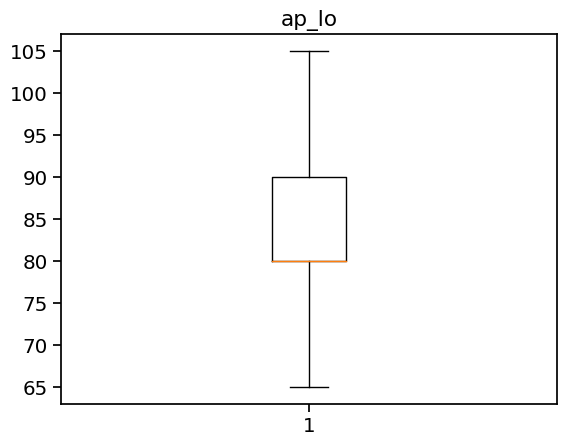

In [68]:
for i in [ 'ap_lo']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

# HEIGHT

In [69]:
Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
Q3 = np.percentile(data['height'],75,interpolation ='midpoint')

<ipython-input-69-4581de931983>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
<ipython-input-69-4581de931983>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
<ipython-input-69-4581de931983>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
 

In [70]:
print(Q1)
print(Q2)
print(Q3)

159.0
165.0
170.0


In [71]:
IQR = Q3-Q1

In [72]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [73]:
low_lim

142.5

In [74]:
up_lim

186.5

In [75]:
outlier=[]
for x in data['height']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)

In [76]:
outlier

[187,
 188,
 76,
 142,
 141,
 195,
 140,
 198,
 187,
 196,
 138,
 187,
 142,
 194,
 190,
 134,
 140,
 136,
 195,
 198,
 187,
 100,
 190,
 190,
 120,
 120,
 187,
 120,
 189,
 189,
 187,
 194,
 189,
 196,
 190,
 140,
 189,
 188,
 187,
 187,
 137,
 192,
 187,
 196,
 122,
 141,
 190,
 250,
 187,
 191,
 190,
 120,
 189,
 142,
 140,
 117,
 187,
 120,
 97,
 190,
 119,
 137,
 198,
 142,
 120,
 188,
 130,
 192,
 136,
 140,
 130,
 190,
 187,
 120,
 110,
 193,
 187,
 190,
 188,
 198,
 187,
 187,
 137,
 191,
 75,
 188,
 187,
 132,
 138,
 188,
 138,
 71,
 190,
 130,
 188,
 138,
 120,
 135,
 140,
 67,
 142,
 189,
 189,
 142,
 70,
 190,
 187,
 189,
 196,
 133,
 74,
 190,
 189,
 100,
 137,
 187,
 190,
 189,
 192,
 187,
 141,
 140,
 133,
 190,
 188,
 141,
 187,
 120,
 190,
 130,
 141,
 190,
 190,
 189,
 207,
 192,
 187,
 140,
 141,
 189,
 140,
 188,
 55,
 120,
 140,
 190,
 120,
 192,
 188,
 195,
 188,
 188,
 187,
 133,
 81,
 120,
 142,
 187,
 190,
 193,
 120,
 141,
 188,
 188,
 190,
 190,
 141,
 140,
 

In [77]:
ind1 = data['height']<low_lim
data.loc[ind1].index

Int64Index([  224,   249,   781,  1048,  2412,  2663,  2944,  3132,  3208,
             3420,
            ...
            66090, 66479, 66643, 66965, 67062, 68325, 69052, 69124, 69430,
            69784],
           dtype='int64', length=223)

In [78]:
ind1 = data['height'] < low_lim
values = data.loc[ind1].index.tolist()
values

[224,
 249,
 781,
 1048,
 2412,
 2663,
 2944,
 3132,
 3208,
 3420,
 3735,
 3752,
 4212,
 5326,
 5774,
 6153,
 6303,
 6821,
 6997,
 7058,
 7116,
 7305,
 8171,
 8677,
 8760,
 9131,
 9284,
 9776,
 10095,
 10116,
 10567,
 11183,
 11230,
 12435,
 12770,
 12980,
 13029,
 13195,
 13265,
 13448,
 13870,
 13952,
 14073,
 14291,
 14323,
 14410,
 15021,
 15167,
 16677,
 16699,
 17074,
 17316,
 17988,
 18062,
 18092,
 19421,
 19672,
 20146,
 20225,
 22239,
 22253,
 22523,
 22723,
 22818,
 22838,
 23024,
 23777,
 23913,
 24006,
 24268,
 24979,
 25036,
 26009,
 26108,
 26931,
 27120,
 27384,
 27603,
 28099,
 28448,
 28513,
 28737,
 28817,
 28897,
 28975,
 29157,
 29567,
 29735,
 29740,
 29894,
 30279,
 30293,
 30327,
 30341,
 30907,
 31042,
 31142,
 31420,
 31657,
 31918,
 32098,
 32128,
 32589,
 32879,
 33534,
 33607,
 34169,
 34241,
 34276,
 34278,
 34288,
 34364,
 34860,
 35080,
 35433,
 35444,
 35774,
 35793,
 35799,
 36727,
 36753,
 37388,
 38330,
 38360,
 39079,
 39098,
 39543,
 39578,
 39962,

In [79]:
data.drop([224,
 249,
 781,
 1048,
 2412,
 2663,
 2944,
 3132,
 3208,
 3420,
 3735,
 3752,
 4212,
 5326,
 5774,
 6153,
 6303,
 6821,
 6997,
 7058,
 7116,
 7305,
 8171,
 8677,
 8760,
 9131,
 9284,
 9776,
 10095,
 10116,
 10567,
 11183,
 11230,
 12435,
 12770,
 12980,
 13029,
 13195,
 13265,
 13448,
 13870,
 13952,
 14073,
 14291,
 14323,
 14410,
 15021,
 15167,
 16677,
 16699,
 17074,
 17316,
 17988,
 18062,
 18092,
 19421,
 19672,
 20146,
 20225,
 22239,
 22253,
 22523,
 22723,
 22818,
 22838,
 23024,
 23777,
 23913,
 24006,
 24268,
 24979,
 25036,
 26009,
 26108,
 26931,
 27120,
 27384,
 27603,
 28099,
 28448,
 28513,
 28737,
 28817,
 28897,
 28975,
 29157,
 29567,
 29735,
 29740,
 29894,
 30279,
 30293,
 30327,
 30341,
 30907,
 31042,
 31142,
 31420,
 31657,
 31918,
 32098,
 32128,
 32589,
 32879,
 33534,
 33607,
 34169,
 34241,
 34276,
 34278,
 34288,
 34364,
 34860,
 35080,
 35433,
 35444,
 35774,
 35793,
 35799,
 36727,
 36753,
 37388,
 38330,
 38360,
 39079,
 39098,
 39543,
 39578,
 39962,
 40326,
 40732,
 40965,
 41268,
 41807,
 42592,
 42661,
 43759,
 44217,
 44388,
 44447,
 44490,
 44824,
 44999,
 45091,
 45398,
 46043,
 46173,
 46203,
 46233,
 46319,
 46374,
 46572,
 46750,
 47298,
 47299,
 47352,
 47925,
 49079,
 49320,
 49596,
 49693,
 49819,
 50136,
 50617,
 50789,
 51043,
 51093,
 51459,
 51837,
 51849,
 51909,
 51913,
 52742,
 52758,
 52962,
 53119,
 53344,
 54500,
 54688,
 54918,
 55387,
 56051,
 56123,
 56518,
 56669,
 56867,
 56925,
 56956,
 57081,
 57369,
 57965,
 58581,
 59437,
 59453,
 59620,
 59625,
 59738,
 59854,
 59972,
 59977,
 60691,
 60838,
 61453,
 61602,
 61753,
 63130,
 63739,
 63751,
 64115,
 64562,
 64787,
 65297,
 66023,
 66090,
 66479,
 66643,
 66965,
 67062,
 68325,
 69052,
 69124,
 69430,
 69784],inplace=True)

In [80]:
outliers = data[(data['height'] < low_lim) | (data['height'] > up_lim)]

In [81]:
data = data[(data['height'] >= low_lim) & (data['height'] <= up_lim)]

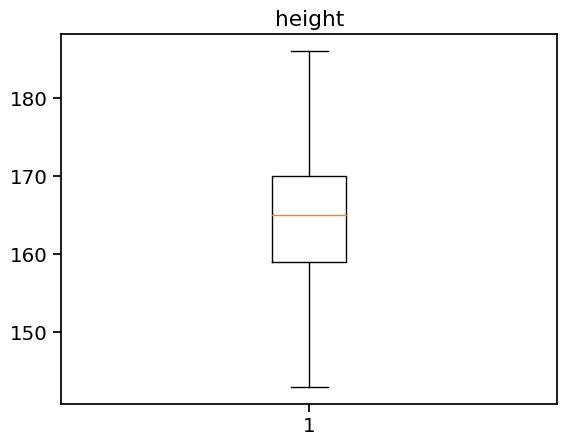

In [82]:
for i in [ 'height']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

# WEIGHT

In [83]:
Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
Q3 = np.percentile(data['weight'],75,interpolation ='midpoint')

<ipython-input-83-55e372bb6143>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
<ipython-input-83-55e372bb6143>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
<ipython-input-83-55e372bb6143>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
 

In [84]:
print(Q1)
print(Q2)
print(Q3)

65.0
72.0
82.0


In [85]:
IQR = Q3-Q1

In [86]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [87]:
low_lim

39.5

In [88]:
up_lim

107.5

In [89]:
outlier=[]
for x in data['weight']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)

In [90]:
outlier

[112.0,
 110.0,
 108.0,
 115.0,
 115.0,
 142.0,
 169.0,
 116.0,
 108.0,
 200.0,
 120.0,
 117.0,
 110.0,
 125.0,
 114.0,
 108.0,
 113.0,
 129.0,
 114.0,
 124.0,
 120.0,
 115.0,
 115.0,
 116.0,
 123.0,
 116.0,
 110.0,
 108.0,
 108.0,
 109.0,
 109.0,
 139.0,
 120.0,
 108.0,
 125.0,
 110.0,
 138.0,
 131.0,
 112.0,
 116.0,
 150.0,
 113.0,
 112.0,
 115.0,
 108.0,
 120.0,
 120.0,
 110.0,
 110.0,
 120.0,
 108.0,
 134.0,
 113.0,
 142.0,
 110.0,
 117.0,
 108.0,
 121.0,
 141.0,
 150.0,
 129.0,
 109.0,
 119.0,
 108.0,
 126.0,
 177.0,
 165.0,
 122.0,
 110.0,
 109.0,
 117.0,
 109.0,
 129.0,
 120.0,
 115.0,
 116.0,
 118.0,
 108.0,
 117.0,
 132.0,
 111.0,
 113.0,
 117.0,
 111.0,
 108.0,
 130.0,
 125.0,
 159.0,
 140.0,
 138.0,
 109.0,
 109.0,
 127.0,
 115.0,
 108.0,
 115.0,
 113.0,
 125.0,
 111.0,
 122.0,
 109.0,
 110.0,
 110.0,
 114.0,
 111.0,
 120.0,
 149.0,
 180.0,
 108.0,
 115.0,
 110.0,
 140.0,
 112.0,
 121.0,
 109.0,
 114.0,
 111.0,
 121.0,
 124.0,
 115.0,
 118.0,
 128.0,
 112.0,
 110.0,
 113.0,


In [91]:
ind1 = data['weight']<low_lim
data.loc[ind1].index

Int64Index([ 5794, 10447, 10627, 11876, 14722, 16322, 16906, 18559, 19582,
            22016, 25198, 26806, 29333, 29488, 33478, 33511, 33817, 33820,
            34282, 35314, 40612, 41353, 44138, 44622, 48613, 51411, 51544,
            54682, 55339, 55852, 58200, 60188, 60699, 65650],
           dtype='int64')

In [92]:
data.drop([5794, 10447, 10627, 11876, 14722, 16322, 16906, 18559, 19582,
            22016, 25198, 26806, 29333, 29488, 33478, 33511, 33817, 33820,
            34282, 35314, 40612, 41353, 44138, 44622, 48613, 51411, 51544,
            54682, 55339, 55852, 58200, 60188, 60699, 65650],inplace=True)

In [93]:
outliers = data[(data['weight'] < low_lim) | (data['weight'] > up_lim)]

In [94]:
data = data[(data['weight'] >= low_lim) & (data['weight'] <= up_lim)]

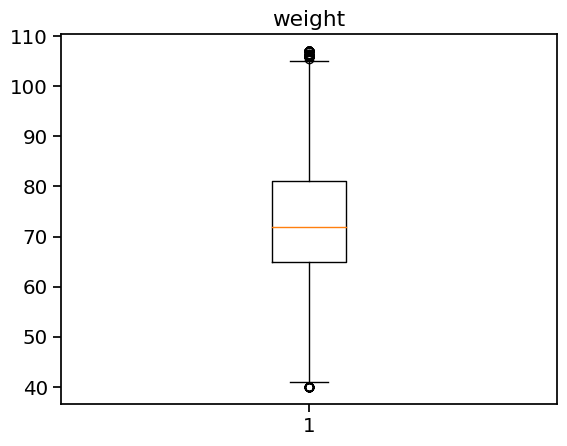

In [95]:
for i in [ 'weight']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

# **AGE**

In [96]:
Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
Q3 = np.percentile(data['age'],75,interpolation ='midpoint')

<ipython-input-96-5597e6188af1>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
<ipython-input-96-5597e6188af1>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
<ipython-input-96-5597e6188af1>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = 

In [97]:
print(Q1)
print(Q2)
print(Q3)

48.0
53.0
58.0


In [98]:
IQR = Q3-Q1

In [99]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [100]:
low_lim

33.0

In [101]:
up_lim

73.0

In [102]:
outlier=[]
for x in data['age']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)

In [103]:
outlier

[29, 29, 30]

In [104]:
ind1 = data['age'] < low_lim
values = data.loc[ind1].index.tolist()

In [105]:
data = data[(data['age'] >= low_lim) & (data['age'] <= up_lim)]

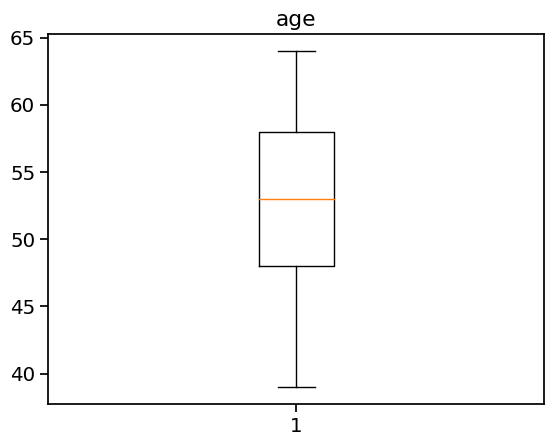

In [106]:
for i in [ 'age']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

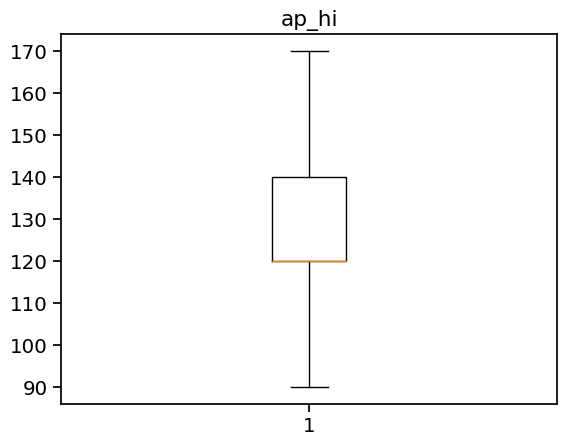

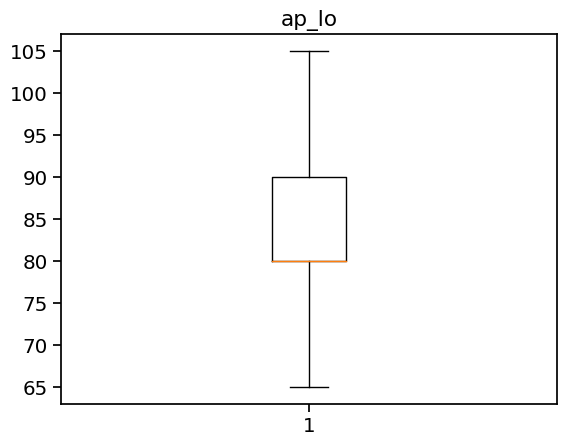

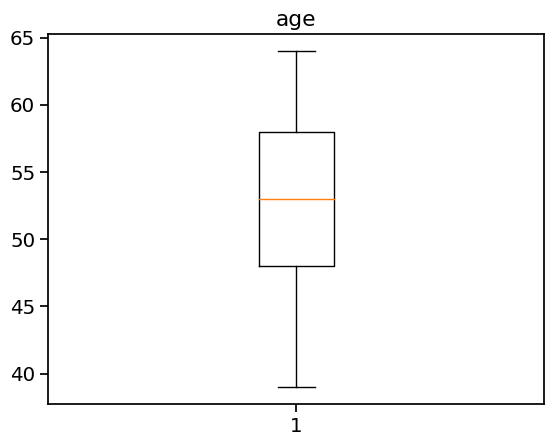

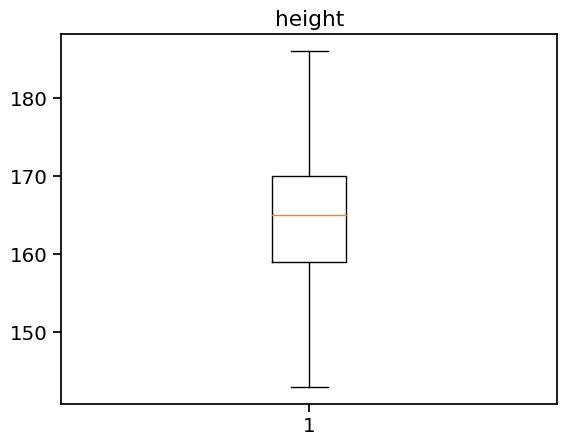

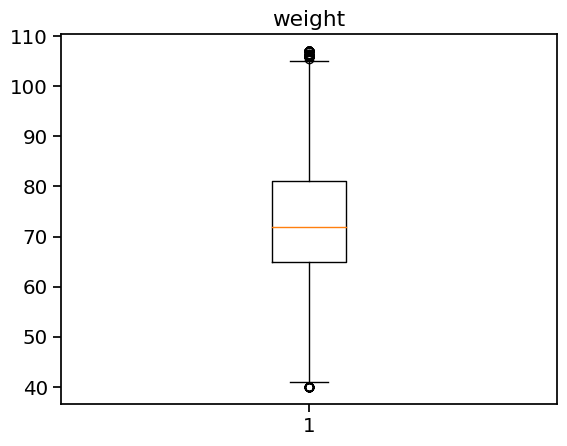

In [107]:
for i in ['ap_hi', 'ap_lo', 'age', 'height', 'weight']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [108]:
data.shape

(62502, 13)

## SCALING

the process of transforming and normalizing the features of a dataset to a consistent range

performed to ensure that all features have similar magnitudes and units, which can improve the performance of certain machine learning algorithms or models

In [109]:
x=data.drop('cardio',axis=1)
y=data['cardio']

# **MIN MAX SCALING**



In [110]:
x.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,49941.878468,52.871620,0.348581,164.406131,73.181456,126.420339,81.699146,0.981489,1.004656,0.086349,0.052174,0.195690
std,28864.471866,6.737086,0.476525,7.531374,12.271998,14.289980,7.673399,0.494277,0.381481,0.280881,0.222380,0.396734
min,0.000000,39.000000,0.000000,143.000000,40.000000,90.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24876.500000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,49980.500000,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,74848.750000,58.000000,1.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,99999.000000,64.000000,1.000000,186.000000,107.000000,170.000000,105.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [111]:
x1=x.drop('id',axis=1)

In [112]:
x1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,1,168,62.0,110,80,1,1,0,0,0
1,55,0,156,85.0,140,90,2,1,0,0,0
2,51,0,165,64.0,130,70,2,1,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,0
5,59,0,151,67.0,120,80,0,0,0,0,1


In [113]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1)

In [114]:
type(x1)

numpy.ndarray

In [115]:
x.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [116]:
x1=pd.DataFrame(x1,columns=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

In [117]:
x1.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,0.554865,0.348581,0.497817,0.495246,0.455254,0.417479,0.490744,0.502328,0.086349,0.052174,0.195690
std,0.269483,0.476525,0.175148,0.183164,0.178625,0.191835,0.247138,0.190741,0.280881,0.222380,0.396734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.000000,0.372093,0.373134,0.375000,0.375000,0.500000,0.500000,0.000000,0.000000,0.000000
50%,0.560000,0.000000,0.511628,0.477612,0.375000,0.375000,0.500000,0.500000,0.000000,0.000000,0.000000
75%,0.760000,1.000000,0.627907,0.611940,0.625000,0.625000,0.500000,0.500000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
x1.shape

(62502, 11)

In [119]:
x1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.44,1.0,0.581395,0.328358,0.250,0.375,0.5,0.5,0.0,0.0,0.0
1,0.64,0.0,0.302326,0.671642,0.625,0.625,1.0,0.5,0.0,0.0,0.0
2,0.48,0.0,0.511628,0.358209,0.500,0.125,1.0,0.5,0.0,0.0,1.0
3,0.36,1.0,0.604651,0.626866,0.750,0.875,0.5,0.5,0.0,0.0,0.0
4,0.80,0.0,0.186047,0.402985,0.375,0.375,0.0,0.0,0.0,0.0,1.0


# **MODELLING**

In [120]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [121]:
X

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50,1,168,62.0,110,80,1,1,0,0,0
1,1,55,0,156,85.0,140,90,2,1,0,0,0
2,2,51,0,165,64.0,130,70,2,1,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,0
5,8,59,0,151,67.0,120,80,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,0,172,70.0,130,90,1,1,0,0,0
69994,99992,57,0,165,80.0,150,80,1,1,0,0,0
69995,99993,52,1,168,76.0,120,80,1,1,1,0,0
69998,99998,61,0,163,72.0,135,80,1,0,0,0,1


In [122]:
y

0        0
1        1
2        1
3        1
5        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 62502, dtype: int64

# LINEAR REGRESSION

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
print('Mean squared error is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

Mean squared error is: 0.19234060344162807
R squared value is: 0.2304078166503346


# DECISION TREE

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [129]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6261999232049149


In [130]:
print(confusion_matrix(y_test, y_pred))

[[5010 2938]
 [2903 4775]]


# LOGISTIC REGRESSION

In [131]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [132]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7026750287981569


In [133]:
print(confusion_matrix(y_test, y_pred))

[[5969 1979]
 [2667 5011]]


# KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [135]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6295277102265455


In [136]:
print(confusion_matrix(y_test, y_pred))

[[5416 2532]
 [3257 4421]]


# RANDOM FOREST 

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
y_pred=rf_clf.predict(X_test)

In [139]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7200819147574555


In [140]:
print(confusion_matrix(y_test,y_pred))

[[5927 2021]
 [2353 5325]]


# NAIVE BAYES

In [141]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [142]:
y_pred = naive_bayes.predict(X_test)

In [143]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7115064635863305


In [144]:
print(confusion_matrix(y_test,y_pred))

[[6685 1263]
 [3245 4433]]


# **HYPERPARAMETER TUNING**

# TUNING DECISION TREE WITH RANDOMISED SEARCH CV

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [146]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

dt_classifier = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9}
Best Accuracy: 0.723654


# TUNING DECISION TREE WITH GRID SEARCH CV

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7242086575654152


# TUNING LOGISTIC REGRESSION WITH GRID SEARCH CV

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Create the pipeline with MinMaxScaler and the classifier
pipeline = Pipeline([
    ('minmaxscaler', MinMaxScaler()),
    ('logisticregression', classifier)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model:", grid_search.best_estimator_)

test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best Model: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])
Test Accuracy: 0.7269018478521718


# TUNING K-NEIGHBOR CLASSIFIER WITH RANDOMIZED SEARCH CV

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'n_neighbors': randint(1, 20),       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]                          # Power parameter for the Minkowski distance metric
}

knn_classifier = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    estimator=knn_classifier,
    param_distributions=param_grid,
    n_iter=10,                      # Number of parameter settings that are sampled
    cv=5,                           # Number of cross-validation folds
    scoring='accuracy',             # Scoring metric for evaluation
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.6407671252874712


# TUNING NAIVE BAYES WITH GRID SEARCH CV

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter for variance estimation
}

nb_classifier = GaussianNB()

grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid,
    cv=5,                # Number of cross-validation folds
    scoring='accuracy'   # Scoring metric for evaluation
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'var_smoothing': 1e-08}
Best Accuracy: 0.7034859134086591


# CROSS VALIDATION

In [167]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data
Y=iris.target
dt_clf=DecisionTreeClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(dt_clf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         0.96666667 0.83333333 0.93333333 0.73333333]
Average Cross Validation score :0.8933333333333333


In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
lr=LogisticRegression(max_iter=1000)
kf=KFold(n_splits=5)
score=cross_val_score(lr,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


In [165]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
iris=load_iris()
X=iris.data
Y=iris.target
knn=KNeighborsClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(knn,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.83333333 0.93333333 0.8       ]
Average Cross Validation score :0.9133333333333333


In [168]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
iris=load_iris()
X=iris.data
Y=iris.target
rf_clf=RandomForestClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(rf_clf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.76666667]
Average Cross Validation score :0.9133333333333333


In [169]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
iris=load_iris()
X=iris.data
Y=iris.target
naive_bayes = GaussianNB()
kf=KFold(n_splits=5)
score=cross_val_score(naive_bayes,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         0.96666667 0.9        0.93333333 0.93333333]
Average Cross Validation score :0.9466666666666667
